In [8]:
# Just testing my github setup
print('Hello World')

Hello World


In [ ]:
#yo this is abi
print ('coding is sadge - agree')

In [ ]:
#help i don't know what i'm doing

# Hermite Polynomials
Hermite Polynomials are an orthonormal basis of the function space defined recursively by$$h_{k+1}x = \left[\left(x-\frac{d}{dx}\right)h_{k}x\right](x);$$the following function generates the Hermite Polynomials up to a degree determined by the user. For instance, $$h_1(x) = \left[\left(x-\frac{\text{d}}{\text{dx}}\right)h_0(x)\right]$$ $$= \left[x(1)-\frac{\text{d}}{\text{dx}}1\right]$$$$= x$$ Likewise, $$h_2(x) = x^2 - 1$$ and so on and so forth.

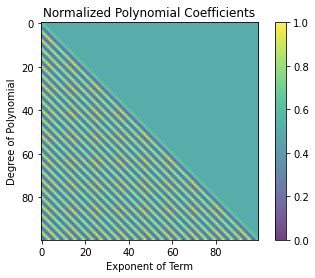

In [16]:
from matplotlib import pyplot as plt
from rich.pretty import pprint
import numpy as np
from math import exp
from tqdm import tqdm
import time

def hermite(degree: int):
    """
    Returns Hermite polynomials up to degree ``degree``;a
        Hermite polynomials defined recursively by h_{k+1}x = [(x - d/dx)h_{k}x](x)
    Polynomials are vectors (lists) whose indices correspond to the exponent of that term, e.g. [1, 0, 2, 4]
        represents 1 + x^2 + 4x^3
    TODO: Use sympy to actually handle functions correctly
    """
    polynomials = [[1], [0, 1]]
    i = 2
    while i < degree:
        # pprint('----------')
        # pprint(f'i = {i}')
        next_polynomial = [0] * (i + 1)
        for j in range(i + 1):
            # pprint(f'j = {j}')
            if j != 0:
                next_polynomial[j] += polynomials[-1][j - 1] # x*h_k(x)
                # pprint('multiplying by x')
                # pprint(f'{polynomials[-1][j - 1]}x^{j}')
            if j + 1 < len(polynomials[-1]):
                next_polynomial[j] -= polynomials[-1][j + 1] * (j + 1) # -d/dx h_k(x)
                # pprint('differentiating')
                # pprint(f'-{polynomials[-1][j + 1] * (j)}x^{j + 1}')
            # else:    
                # print(f'Done with Hermite polynomial with degree {i}')
        polynomials.append(next_polynomial)
        # pprint(f'Done with Hermite polynomial with degree {i}')
        i += 1
    return polynomials

def sigmoid(x):
    # print(x)
    try:
        return 1.0 / (1.0 + exp(-1 * x))
    except:
        return 0 if x < 0 else 1

degree = 100
hermites = hermite(degree)
plottable_polynomials = np.zeros((degree, degree))
i = 0
while i < plottable_polynomials.shape[0]:
    j = 0
    while j < plottable_polynomials.shape[1]:
        break_j = False
        try:
            plottable_polynomials[i][j] = hermites[i][j]
        except IndexError:
            break_j = True
        finally:
            j += 1
        if break_j:
            break
    i += 1
plt.imshow([[sigmoid(y) for y in x] for x in plottable_polynomials], cmap=plt.cm.viridis, alpha=.75,
           interpolation='bilinear')
plt.colorbar()
plt.title("Normalized Polynomial Coefficients")
plt.ylabel("Degree of Polynomial")
plt.xlabel("Exponent of Term")
plt.show()

# Orthonormal Basis
As we can see, each subsequent polynomial adds one degree; this occurs because of the multiplication by $x$ to generate each polynomial recursively. Because any sequence of polynomials with increasing degree up to $m$ forms a basis of $\mathcal{P}_m(\mathbb{F})$, we can conclude that the Hermite polynomials form a basis of the infinite-dimensional $\mathcal{P}_n(\mathbb{F})$. To test if they are orthonormal, we confirm that the pairwise inner products of the Hermite polynomials are 0. The inner product is defined as $$\langle f, g \rangle = \int_{-\infty}^{\infty} f(x)g(x)e^{-\frac{x^2}{2}}\,\text{d}x.$$

In [ ]:
from scipy.integrate import quad

# integral = quad(integrand1,-np.inf,np.inf)

def polynomify(coeffs):
    f = lambda x: sum([value * x**count for count, value in enumerate(coeffs)])
    return f

fns = [polynomify(i) for i in hermites]
x = np.linspace(-1, 1, 1000)
fns_plotted = [[fn(i) for fn in fns] for i in x]
plt.plot(fns_plotted)
plt.yscale('log')
plt.title('Hermite Polynomials Plotted on Logarithmic Scale')
plt.show()

i = 0

while i < len(hermites):
    j = i + 1
    while j < len(hermites):
        f = lambda x: polynomify(hermites[i])(x)
        g = lambda x: polynomify(hermites[j])(x)
        prod = lambda x: f(x) * g(x)

        print(f'<h_{i}, h_{j}> = {round(i) for i in (quad(prod, -np.inf, np.inf), 3)}')
        j += 1
    i += 1